<a href="https://colab.research.google.com/github/L120Git/NLP_Google_Restaurants/blob/main/4_NLP_Conclusiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. Librerías necesarias

In [ ]:
#Librerias necesarias
import numpy as np
import pandas as pd
from google.colab import drive
import random
#import rarfile # para descomprimir archivos
import json
#import csv 
import pickle
#para representar
import matplotlib.pyplot as plt

#modelado
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import os
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow
from tensorflow import keras
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from sklearn.svm import SVC
from keras.layers import Embedding, LSTM, Dense, Dropout, GRUV2, SimpleRNN
import pickle #para guardar los modelos
#reporte
from sklearn.metrics import classification_report, accuracy_score, roc_curve, precision_recall_curve

#1. cargamos los datos

In [ ]:
# Montamos GDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#cargamos los datos necesarios desde nuestro google drive
path = '/content/drive/MyDrive/NLP/'

X_train = np.load(f'{path}x_train.npy', allow_pickle=True)
X_test = np.load(f'{path}x_test.npy', allow_pickle=True)
y_train = np.load(f'{path}y_train.npy', allow_pickle=True)
y_test = np.load(f'{path}y_test.npy', allow_pickle=True)
#extractor de caracteristicas para la RL
X_train_tfidf = np.load(f'{path}X_train_tfidf.npy', allow_pickle=True)
X_test_tfidf = np.load(f'{path}X_test_tfidf.npy', allow_pickle=True)

#predicciones de la RL para mostrar resultados
train_predict = np.load(f'{path}train_predict.npy', allow_pickle=True)
test_predict = np.load(f'{path}test_predict.npy', allow_pickle=True)
train_acc = np.load(f'{path}train_acc.npy', allow_pickle=True)


#para mostrar resultados del árbol
test_acc = np.load(f'{path}test_acc.npy', allow_pickle=True)
c_params = np.load(f'{path}c_params.npy', allow_pickle=True)
test_predict_clf = np.load(f'{path}test_predict_clf.npy', allow_pickle=True)

#para mostrar resultados de la red neuronal
m_c_predict = np.load(f'{path}m_c_predict.npy', allow_pickle=True)
H_loss = np.load(f'{path}H_loss.npy', allow_pickle=True)
H_val_loss = np.load(f'{path}H_val_loss.npy', allow_pickle=True)


In [ ]:
#cargamos el modelo de regresión logística
path = '/content/drive/MyDrive/NLP/'

with open(f'{path}lr_model.pkl', 'rb') as f:
    lr_model = pickle.load(f)

#cargamos el modelo del gradient boosting
with open(f'{path}clf2.pkl', 'rb') as f:
    clf2 = pickle.load(f)

#cargamos el modelo de la red neuronal
with open(f'{path}model_custom.pkl', 'rb') as f:
    model_custom = pickle.load(f)


Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-03-12 18:45:56           64
config.json                                    2023-03-12 18:45:56         2473
variables.h5                                   2023-03-12 18:45:56    167080320
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......embedding
.........vars
............0
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...vars


#2. Representación de datos

## 2.1 Regresión Logística

In [ ]:
lr_model

LogisticRegression(C=10000, max_iter=1000)

In [ ]:
print('Confussion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict)))

Confussion matrix:
[[562 278]
 [275 724]]

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       840
           1       0.72      0.72      0.72       999

    accuracy                           0.70      1839
   macro avg       0.70      0.70      0.70      1839
weighted avg       0.70      0.70      0.70      1839

Accuracy score:0.6992930940728657


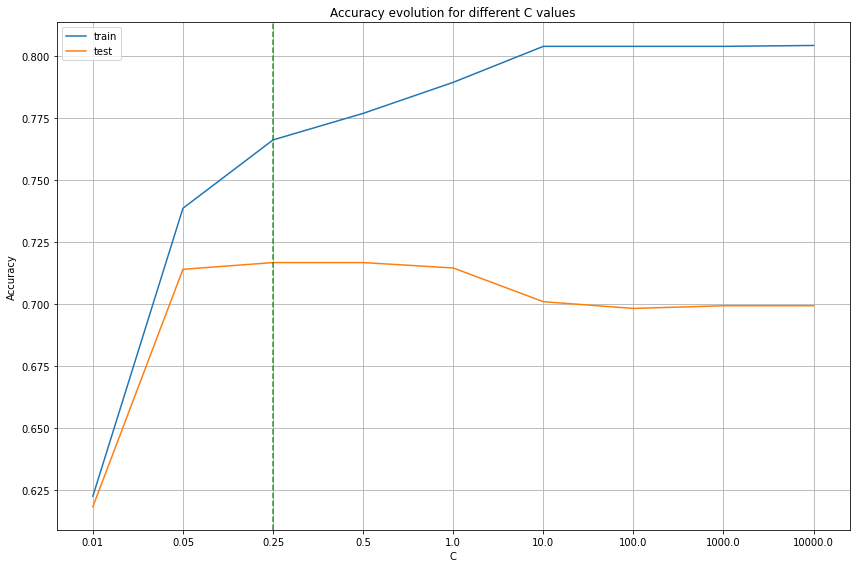

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.axvline(np.argmax(test_acc), c='g', ls='--', alpha=0.8)
plt.title('Accuracy evolution for different C values')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.xticks(list(range(len(c_params))), c_params)
plt.tight_layout()
plt.show()

In [ ]:
p, r, thresholds = precision_recall_curve(y_test, test_predict)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

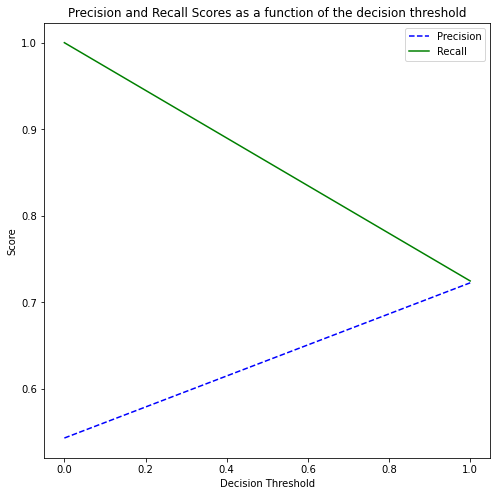

In [ ]:
plot_precision_recall_vs_threshold(p, r, thresholds)

## 2.2 Gradient Boosting

In [ ]:
clf2

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, n_estimators=64,
                           random_state=42)

In [ ]:
#predict y algunas métricas

print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, test_predict_clf)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict_clf)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, test_predict_clf)))

Confusion matrix:
[[533 307]
 [210 789]]

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.63      0.67       840
           1       0.72      0.79      0.75       999

    accuracy                           0.72      1839
   macro avg       0.72      0.71      0.71      1839
weighted avg       0.72      0.72      0.72      1839

Accuracy score: 0.7189


##2.3 Red neuronal con word2vec

In [ ]:
model_custom

In [ ]:
#mostramos algunas métricas 
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, m_c_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, m_c_predict)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, m_c_predict)))

Confusion matrix:
[[  9 831]
 [ 12 987]]

Classification report:
              precision    recall  f1-score   support

           0       0.43      0.01      0.02       840
           1       0.54      0.99      0.70       999

    accuracy                           0.54      1839
   macro avg       0.49      0.50      0.36      1839
weighted avg       0.49      0.54      0.39      1839

Accuracy score: 0.5416


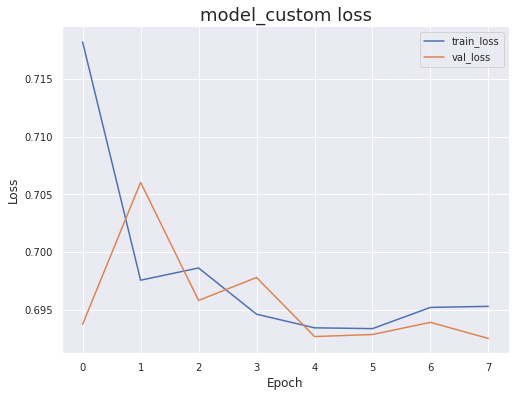

In [ ]:
#representamos la gráfica de perdidas
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
plt.plot(H_loss, label='train_loss')
plt.plot(H_val_loss, label='val_loss')
plt.title('model_custom loss', fontsize=18)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', fontsize=10)
sns.despine()
plt.show()

#3. Conclusiones

Dados los datos de predición estudiados en notebooks anteriores, el modelo más preciso es el 'gradient boosting clasifier', obteniendo casi el mismo resultado que la regresión logística.

Creo que podría haber conseguido unos valores parecidos con la red neuronal si hubiera aplicado un Hyperopt para obterner los mejores parámetros y además hubiera ampliado el máximo número de características del word2vec para mejorar la capa de embedding y, a su vez, ampliar los datos de entrada. En cualquier caso, también podría ampliar la selección de datos de todo el conjunto. 

Sin embargo, dado que nos encontramos con un dataset lleno de coloquialismos, extranjerismos, simbolos, ect. Y viendo que no voy a obtener mejores resultados a corto plazo, decido parar aquí mi análisis. 